## Importing Historical Data For One Coin

In [1]:
#! pip install Historic_Crypto
import Historic_Crypto
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import HistoricalData
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
# Check for all available assets
Cryptocurrencies().find_crypto_pairs()

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


,id,display_name,fx_stablecoin,max_slippage_percentage,status
0,MCO2-USDT,MCO2/USDT,False,0.03000000,online
1,DOT-USD,DOT/USD,False,0.03000000,online
2,MANA-EUR,MANA/EUR,False,0.03000000,online
3,TRU-EUR,TRU/EUR,False,0.03000000,online
4,SKL-BTC,SKL/BTC,False,0.03000000,online
...,...,...,...,...,...
469,XRP-USD,XRP/USD,False,0.10000000,delisted
470,XRP-GBP,XRP/GBP,False,0.10000000,delisted
471,GNT-USDC,GNT/USDC,False,0.03000000,delisted
472,XRP-EUR,XRP/EUR,False,0.10000000,delisted


In [3]:
# We want daily evaluations: 60*60*24
# Start jan 01, 2020 to Dec 01, 2021
eth = HistoricalData('ETH-USD',86400,'2020-01-01-00-00',
                     '2021-12-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Data for chunk 3 of 3 extracted


In [4]:
# The pandas dataframe
eth

,low,high,open,close,volume
time,,,,,
2020-01-02,125.83,130.18,130.14,126.81,49211.569015
2020-01-03,125.52,134.93,126.81,134.17,88651.892848
2020-01-04,132.50,135.75,134.17,134.14,31254.847124
2020-01-05,134.14,138.97,134.14,135.31,45353.693112
2020-01-06,134.78,144.51,135.31,144.19,91523.609927
...,...,...,...,...,...
2021-11-27,4031.56,4186.97,4043.62,4098.31,93299.562719
2021-11-28,3950.00,4303.35,4098.53,4298.38,124752.712620
2021-11-29,4282.07,4466.00,4298.38,4449.42,170935.207319


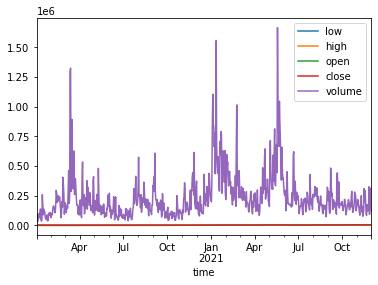

In [5]:
eth.plot.line();

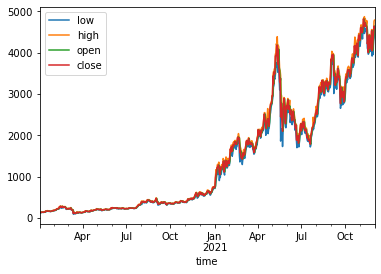

In [6]:
# Volume is very high, se lets filter it out
eth[["low", "high", "open", "close"]].plot.line();

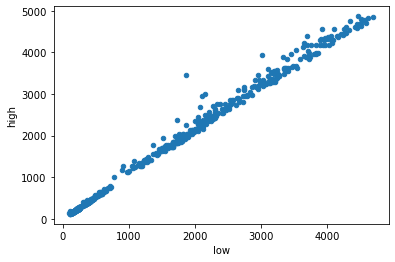

In [7]:
eth.plot.scatter(x="low", y="high", marker="o");

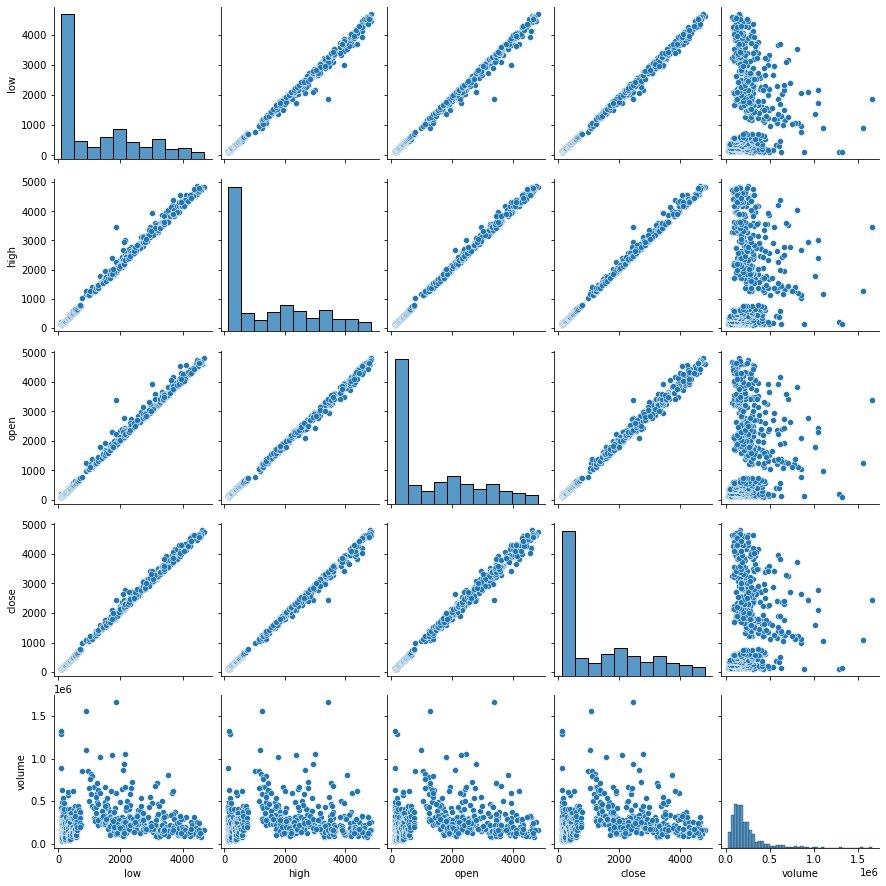

In [8]:
# High correlation between price indicators
sns.pairplot(eth);

In [9]:
# Create a new variable as the average of price indicators
eth["price"] = eth[["low", "high", "open", "close"]].mean(axis=1)
eth.head()

,low,high,open,close,volume,price
time,,,,,,
2020-01-02,125.83,130.18,130.14,126.81,49211.569015,128.2400
2020-01-03,125.52,134.93,126.81,134.17,88651.892848,130.3575
2020-01-04,132.50,135.75,134.17,134.14,31254.847124,134.1400
2020-01-05,134.14,138.97,134.14,135.31,45353.693112,135.6400
2020-01-06,134.78,144.51,135.31,144.19,91523.609927,139.6975


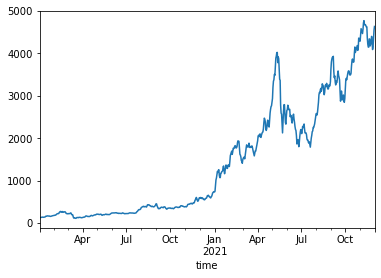

In [10]:
eth["price"].plot();

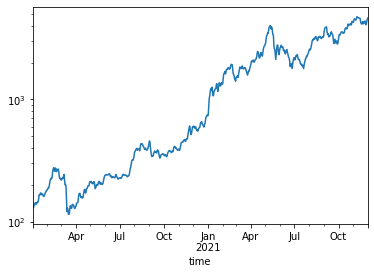

In [11]:
# Turn to logarithmic scale
eth["price"].plot(logy=True);

## Create Dataframe of Selected Coins

In [12]:
# We will select 5 different cryptocoins
# first extract the IDs and convert it into a list
Cryptocurrencies().find_crypto_pairs()["id"].tolist()[:10]

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


['XYO-USDT',
 'OMG-USD',
 'ICP-BTC',
 'BCH-USD',
 'NKN-USD',
 'MDT-USD',
 'ALGO-BTC',
 'DOT-USDT',
 'ETC-EUR',
 'SUPER-USDT']

In [13]:
#for item in Cryptocurrencies().find_crypto_pairs()["id"].tolist():
#    print(item)

In [14]:
# Find only Euros
for item in Cryptocurrencies().find_crypto_pairs()["id"].tolist():
    if "EUR" in item: print(item)

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
ETC-EUR
KRL-EUR
MINA-EUR
BAND-EUR
MIR-EUR
FORTH-EUR
BADGER-EUR
CRO-EUR
SUSHI-EUR
LCX-EUR
USDC-EUR
CHZ-EUR
XTZ-EUR
DESO-EUR
TRU-EUR
BTRST-EUR
DDX-EUR
FIL-EUR
ZRX-EUR
GRT-EUR
XYO-EUR
LINK-EUR
ARPA-EUR
BNT-EUR
FIDA-EUR
EOS-EUR
OMG-EUR
ETH-EUR
APE-EUR
ENS-EUR
LQTY-EUR
SUKU-EUR
XLM-EUR
RAD-EUR
SNX-EUR
REQ-EUR
AUCTION-EUR
CTX-EUR
ALCX-EUR
BICO-EUR
MASK-EUR
WCFG-EUR
TRAC-EUR
BAT-EUR
BTC-EUR
ALGO-EUR
ADA-EUR
MATIC-EUR
BCH-EUR
MANA-EUR
POWR-EUR
ANKR-EUR
AVAX-EUR
CLV-EUR
DIA-EUR
GALA-EUR
AAVE-EUR
PERP-EUR
NU-EUR
CGLD-EUR
RLY-EUR
RNDR-EUR
NMR-EUR
NCT-EUR
UMA-EUR
IOTX-EUR
SHIB-EUR
UNI-EUR
AXS-EUR
SOL-EUR
USDT-EUR
NKN-EUR
SHPING-EUR
VGX-EUR
ICP-EUR
WLUNA-EUR
1INCH-EUR
ATOM-EUR
LTC-EUR
CRV-EUR
UST-EUR
ERN-EUR
SKL-EUR
DOGE-EUR
DOT-EUR
XRP-EUR


In [15]:
# Choose these 5 using a dictionary and then convert it into a pd dataframe
coins2eval = ["BTC-EUR", "ETH-EUR", "XLM-EUR", "ALGO-EUR", "LINK-EUR"]

In [16]:
coinpricesD = {}
for ticker in coins2eval:
    # Import historical data
    temp = HistoricalData(ticker,86400,'2020-01-01-00-00',
                     '2021-12-01-00-00').retrieve_data()
    # take average price
    ave = temp[["low", "high", "open", "close"]].mean(axis=1)
    # store the price in dictionary
    coinpricesD[ticker] = ave

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Data for chunk 3 of 3 extracted
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Data

In [17]:
coinpricesD.keys()

dict_keys(['BTC-EUR', 'ETH-EUR', 'XLM-EUR', 'ALGO-EUR', 'LINK-EUR'])

In [18]:
# Convert dictionary into data frame
coinprices = pd.DataFrame(coinpricesD)
coinprices

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-01-02,6308.8575,114.7475,0.039717,NaN,NaN
2020-01-03,6392.0275,116.7225,0.039859,NaN,NaN
2020-01-04,6577.2700,120.3050,0.040733,NaN,NaN
2020-01-05,6610.8125,121.7200,0.040897,NaN,NaN
2020-01-06,6770.9825,125.0450,0.043053,NaN,NaN
...,...,...,...,...,...
2021-11-27,48144.6975,3621.7500,0.290214,1.46295,21.444782
2021-11-28,49336.3000,3688.0850,0.282654,1.47900,21.357445
2021-11-29,51151.0100,3877.1150,0.290295,1.55515,22.163015


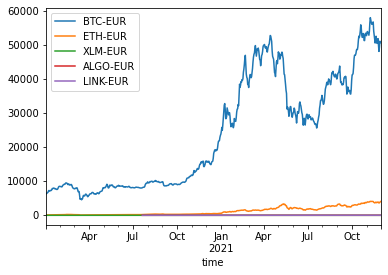

In [19]:
coinprices.plot();

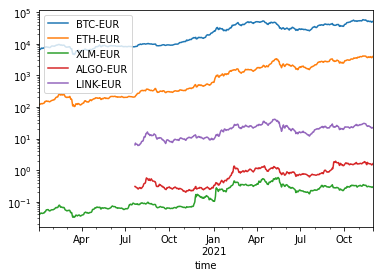

In [20]:
coinprices.plot(logy=True);

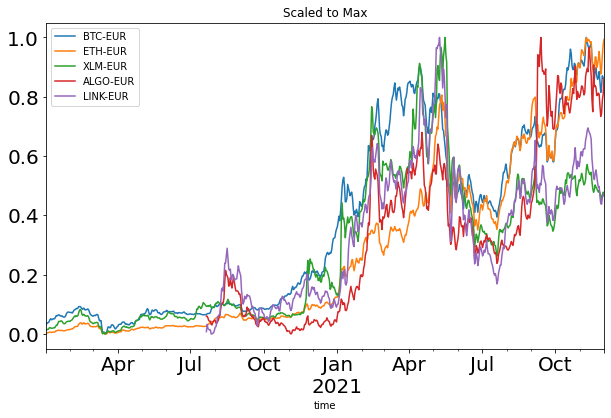

In [21]:
# Scale the data 0-1
coinpricesScaled = (coinprices-coinprices.min())/(coinprices.max() -coinprices.min())
coinpricesScaled.plot(title="Scaled to Max", fontsize=20,
                      figsize=(10,6));

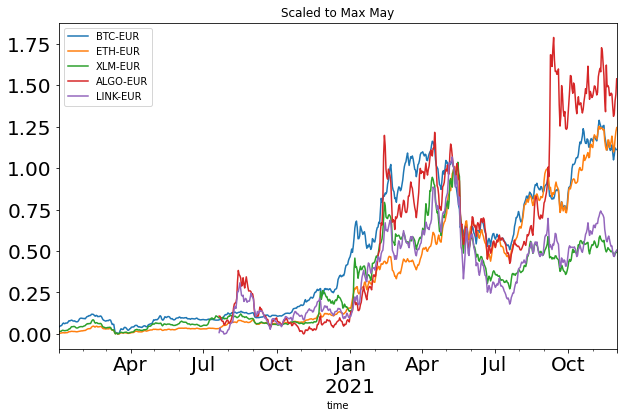

In [22]:
# Scaled to value of 1 at May 11, 2021
coinpricesScaled = (coinprices-coinprices.min())/(coinprices.loc["2021-05-11"].values[:] -coinprices.min())
coinpricesScaled.plot(title="Scaled to Max May", fontsize=20,
                      figsize=(10,6));

## Data Dimensionality via PCA

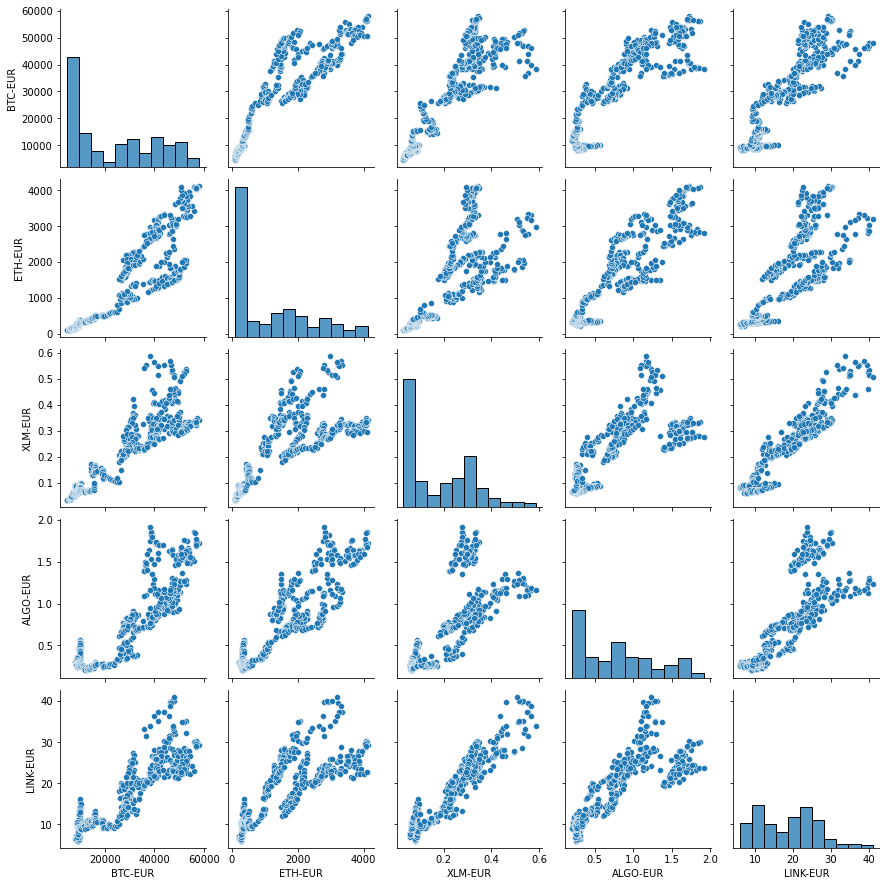

In [23]:
# Create a pairplot for all the 5 currencies
sns.pairplot(coinprices);

In [24]:
# Compute a Correlation Matrix
#ALGO and LINK have missing values to be dealt with
coinprices.corr()

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
BTC-EUR,1.000000,0.912027,0.922419,0.880745,0.882267
ETH-EUR,0.912027,1.000000,0.815103,0.902632,0.790730
XLM-EUR,0.922419,0.815103,1.000000,0.729552,0.946394
ALGO-EUR,0.880745,0.902632,0.729552,1.000000,0.807993
LINK-EUR,0.882267,0.790730,0.946394,0.807993,1.000000


In [25]:
coinpricesScaled.corr() # Correlation is dimensionless :)

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
BTC-EUR,1.000000,0.912027,0.922419,0.880745,0.882267
ETH-EUR,0.912027,1.000000,0.815103,0.902632,0.790730
XLM-EUR,0.922419,0.815103,1.000000,0.729552,0.946394
ALGO-EUR,0.880745,0.902632,0.729552,1.000000,0.807993
LINK-EUR,0.882267,0.790730,0.946394,0.807993,1.000000


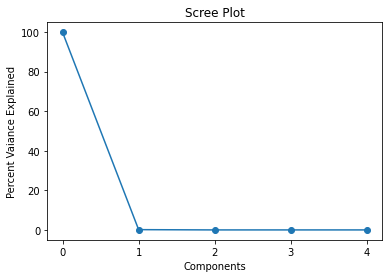

In [26]:
# PCA: NaNs are problematic for PCA
pca = PCA() # Create an instance
pca.fit(coinprices.dropna())

plt.plot(100*pca.explained_variance_ratio_, "o-", label="Raw Data")
plt.xlabel("Components")
plt.ylabel("Percent Vaiance Explained")
plt.xticks(range(pca.n_components_))
plt.title("Scree Plot")
plt.show()

# First component explains all the variance

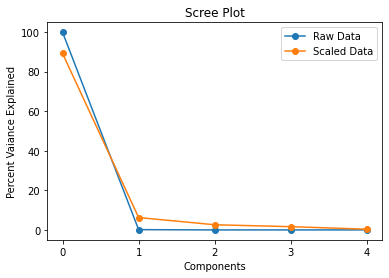

In [27]:
# PCA for scaled data
pca = PCA() # Create an instance
pca.fit(coinprices.dropna())

pcaS = PCA() # Create an instance
pcaS.fit(coinpricesScaled.dropna())

plt.plot(100*pca.explained_variance_ratio_, "o-", label="Raw Data")
plt.plot(100*pcaS.explained_variance_ratio_, "o-", label="Scaled Data")
plt.xlabel("Components")
plt.ylabel("Percent Vaiance Explained")
plt.xticks(range(pca.n_components_))
plt.title("Scree Plot")
plt.legend()
plt.show()

# Scaled data by may shows that there is more than one component
# The whole system is driven by a sinle underlying factor

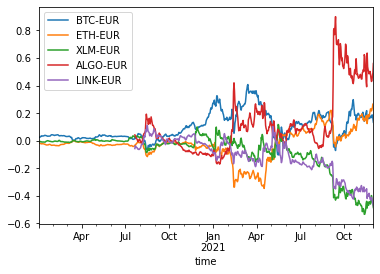

In [28]:
# Subtract the average
coinpricesScaledCentered = coinpricesScaled.sub(coinpricesScaled.mean(axis=1),axis=0)
coinpricesScaledCentered.plot();

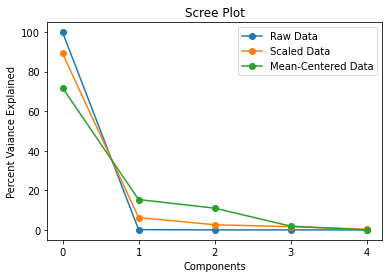

In [29]:
# PCA for scaled data
pca = PCA() # Create an instance
pca.fit(coinprices.dropna())

pcaS = PCA() # Create an instance
pcaS.fit(coinpricesScaled.dropna())

pcaM = PCA()
pcaM.fit(coinpricesScaledCentered.dropna())

plt.plot(100*pca.explained_variance_ratio_, "o-", label="Raw Data")
plt.plot(100*pcaS.explained_variance_ratio_, "o-", label="Scaled Data")
plt.plot(100*pcaM.explained_variance_ratio_, "o-", label="Mean-Centered Data")
plt.xlabel("Components")
plt.ylabel("Percent Vaiance Explained")
plt.xticks(range(pca.n_components_))
plt.title("Scree Plot")
plt.legend()
plt.show()

## Simulate DCA Investment

In [30]:
# Simulation 1: Invest 10 Euros each day for two years

dailyInvest = 10

# Coin to simulate: ETH

whichCoin = "ETH-EUR"

# initialize investment amount
euroInvest = 0
coinInvest = 0

# Loop throught the days
for dayi in range(coinprices.shape[0]):
    
    # Buy coin
    coin = dailyInvest / coinprices[whichCoin][dayi]
    
    # Add to the total
    
    euroInvest += dailyInvest
    coinInvest += coin

# The value of investment
eurosAtEnd = coinInvest*coinprices[whichCoin][-1]

print(f"Total Coin Invested is {coinInvest:.2f} ETH")
print(f"Total Euro Invested is \u20ac{euroInvest}")
print(f"Total Euro Earned is \u20ac{eurosAtEnd:.2f}")
print(f"Total Profit is \u20ac{(eurosAtEnd - euroInvest):.2f}")

Total Coin Invested is 18.15 ETH
Total Euro Invested is €7000
Total Euro Earned is €74275.16
Total Profit is €67275.16


In [31]:
# Use vectorization to store the stuff
dailyInvest = 10
# Coin to simulate: ETH
whichCoin = "ETH-EUR"
# initialize investment amount
euroInvest = np.zeros(coinprices.shape[0])
coinInvest = np.zeros(coinprices.shape[0])
#coin = np.zeros(coinprices.shape[0])

for i in range(coinprices.shape[0]):
    
    # Add the purchase and total investment
    coinInvest[i] = dailyInvest/coinprices[whichCoin][i]
    euroInvest[i] += dailyInvest

eurosAtEnd = np.sum(coinInvest)*coinprices[whichCoin][-1]

print(f"Total Coin Invested is {np.sum(coinInvest):.2f} {whichCoin[:-4]}")
print(f"Total Euro Invested is \u20ac{np.sum(euroInvest)}")
print(f"Total Euro Earned is \u20ac{eurosAtEnd:.2f}")
print(f"Total Profit is \u20ac{(eurosAtEnd - np.sum(euroInvest)):.2f}")

Total Coin Invested is 18.15 ETH
Total Euro Invested is €7000.0
Total Euro Earned is €74275.16
Total Profit is €67275.16


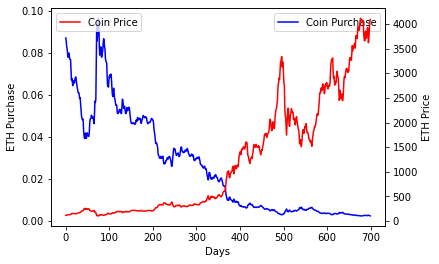

In [32]:
ETH = np.array(coinprices[whichCoin])
fig,ax = plt.subplots(1)
ax.plot(coinInvest, "b", label="Coin Purchase")
ax.set_xlabel("Days")
ax.set_ylabel("ETH Purchase")
ax.legend(loc=0)
ax2 = ax.twinx()
ax2.plot(ETH, "r", label="Coin Price")
ax2.set_ylabel("ETH Price")
ax2.legend(loc=0)
plt.show()

In [33]:
# Simulation 2
dailyInvestUp = 7 # If previous day was down
dailyInvestDn = 15 # If previous day was up
 
# Coin to simulate: ETH

whichCoin = "ETH-EUR"

# initialize investment amount
euroInvest = 0
coinInvest = 0

# Loop throught the days
for dayi in range(1, coinprices.shape[0]):
    
    if (coinprices[whichCoin][dayi] > coinprices[whichCoin][dayi-1]):
        coin = dailyInvestUp / coinprices[whichCoin][dayi]
        euroInvest += dailyInvestUp
    else:
        coin = dailyInvestDn / coinprices[whichCoin][dayi]
        euroInvest += dailyInvestDn

    # Add to the total
    coinInvest += coin

# The value of investment
eurosAtEnd = coinInvest*coinprices[whichCoin][-1]

print(f"Total Coin Invested is {coinInvest:.2f} ETH")
print(f"Total Euro Invested is \u20ac{euroInvest}")
print(f"Total Euro Earned is \u20ac{eurosAtEnd:.2f}")
print(f"Total Profit is \u20ac{(eurosAtEnd - euroInvest):.2f}")

Total Coin Invested is 18.60 ETH
Total Euro Invested is €7189
Total Euro Earned is €76107.07
Total Profit is €68918.07


In [34]:
# Simulation 3
dailyInvest = 10

whichCoin = "ETH-EUR"

# initialize investment amount
euroInvest = 0
coinInvest = 0
toinvest = 0

# Loop throught the days
for dayi in range(1, coinprices.shape[0]):
    
    # Compute percent change from previous day
    pctchng = 100*(coinprices[whichCoin][dayi] - coinprices[whichCoin][dayi-1])/coinprices[whichCoin][dayi-1]
    
    if pctchng > 0:
        coin = dailyInvest / coinprices[whichCoin][dayi]
        euroInvest += dailyInvest
    
    else:
        toinvest = dailyInvest*(-pctchng)
        coin = toinvest / coinprices[whichCoin][dayi]
        euroInvest += toinvest
        
    # Add to the total
    coinInvest += coin

# The value of investment
eurosAtEnd = coinInvest*coinprices[whichCoin][-1]

print(f"Total Coin Invested is {coinInvest:.2f} ETH")
print(f"Total Euro Invested is \u20ac{euroInvest:.2f}")
print(f"Total Euro Earned is \u20ac{eurosAtEnd:.2f}")
print(f"Total Profit is \u20ac{(eurosAtEnd - euroInvest):.2f}")

Total Coin Invested is 30.04 ETH
Total Euro Invested is €11609.94
Total Euro Earned is €122940.08
Total Profit is €111330.13


In [35]:
# Simulation 3
dailyInvest = 10

whichCoin = "ETH-EUR"

# initialize investment amount
euroInvest = 0
coinInvest = 0
pctchng = [0]*coinprices.shape[0]

# Loop throught the days
for dayi in range(1, coinprices.shape[0]):
    
    # Compute percent change from previous day
    pctchng[dayi] = 100*(coinprices[whichCoin][dayi] - coinprices[whichCoin][dayi-1])/coinprices[whichCoin][dayi-1]
    
    if pctchng[dayi] > 0:
        toinvest += dailyInvest
    
    else:
        toinvest = dailyInvest*(-pctchng[dayi])
        
    # Add to the total
    coin = toinvest / coinprices[whichCoin][dayi]
    euroInvest += toinvest
    coinInvest += coin

# The value of investment
eurosAtEnd = coinInvest*coinprices[whichCoin][-1]

print(f"Total Coin Invested is {coinInvest:.2f} ETH")
print(f"Total Euro Invested is \u20ac{euroInvest:.2f}")
print(f"Total Euro Earned is \u20ac{eurosAtEnd:.2f}")
print(f"Total Profit is \u20ac{(eurosAtEnd - euroInvest):.2f}")

Total Coin Invested is 69.83 ETH
Total Euro Invested is €27234.55
Total Euro Earned is €285754.93
Total Profit is €258520.38


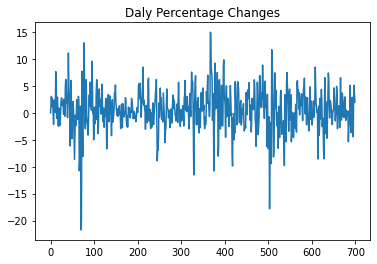

In [36]:
plt.plot(pctchng)
plt.title("Daly Percentage Changes")
plt.show()

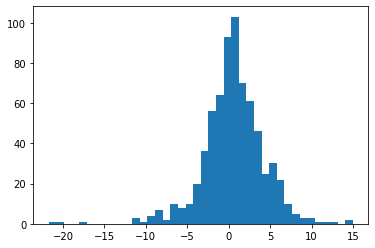

In [37]:
plt.hist(pctchng, bins=40);

## Bonus: Which Coin You Should Have Bought

Simulate DCA 10 Euros per day for 5 different coins

In [38]:
# how much to invest per time unit (day)
dailyInvest = 10

# initialize dictionary of investments (coin:amount)
euroInvest = {}
coinInvest = {}

# loop through days
for dayi in range(coinprices.shape[0]):
    
    # loop over coins
    for coinname in coins2eval:
        # initialize on day 1
        if dayi==0:
            euroInvest[coinname] = 0
            coinInvest[coinname] = 0
        else:
            # how much crypto did we buy on this day?
            coin = dailyInvest / coinprices[coinname][dayi]

            # skip this data point if no data
            if np.isnan(coin): continue

            # add to totals
            euroInvest[coinname] += dailyInvest
            coinInvest[coinname] += coin

In [39]:
# convert from coin to euro and print
for coinname in coins2eval:
    eurosAtEnd = coinInvest[coinname]*coinprices[coinname][-1]
    print(f'{coinname[:-4]:>4}: \u20ac{euroInvest[coinname]:,.2f} \u21e8 \u20ac{eurosAtEnd:>9,.2f}')

 BTC: €6,990.00 ⇨ €25,441.49
 ETH: €6,990.00 ⇨ €73,918.54
 XLM: €6,990.00 ⇨ €20,277.27
ALGO: €4,990.00 ⇨ €16,143.64
LINK: €4,990.00 ⇨ € 7,393.87
